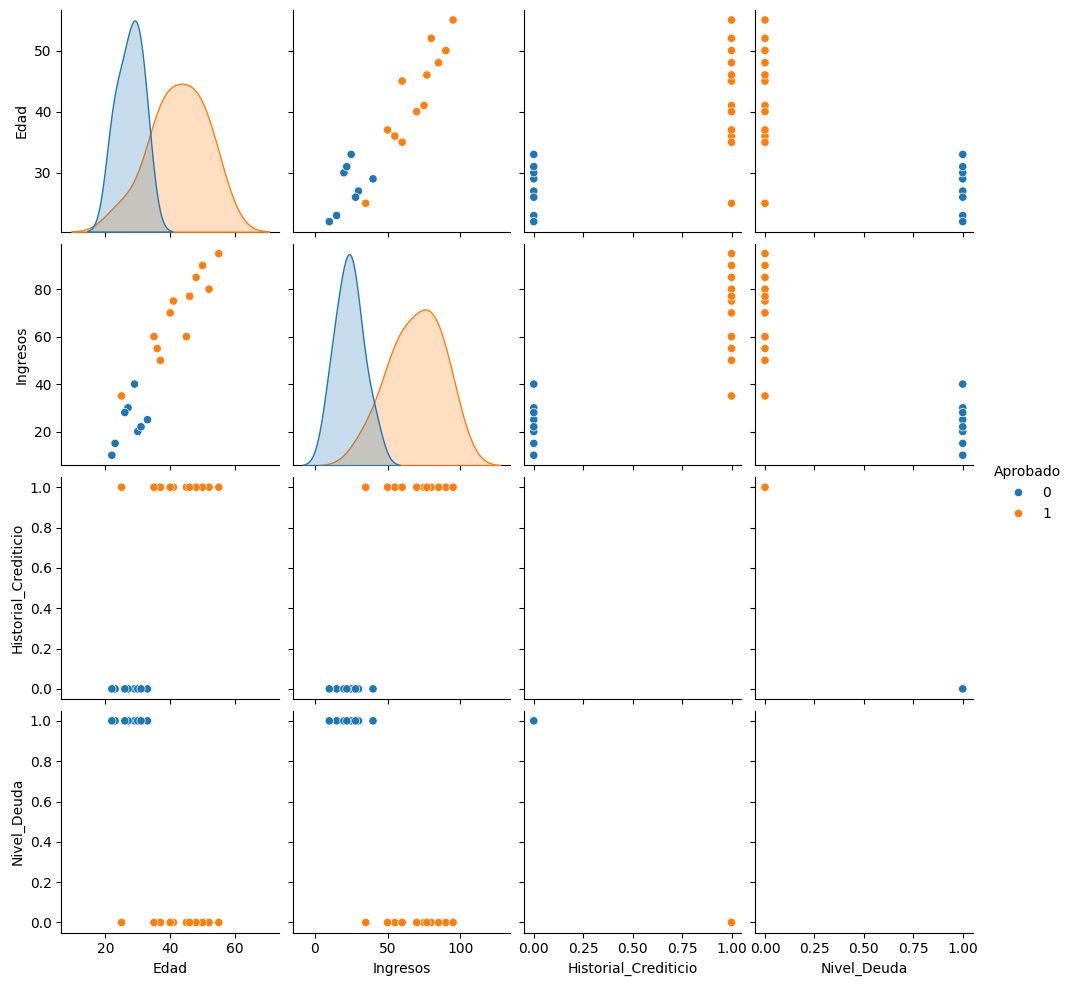

Precisión del modelo: 1.00

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



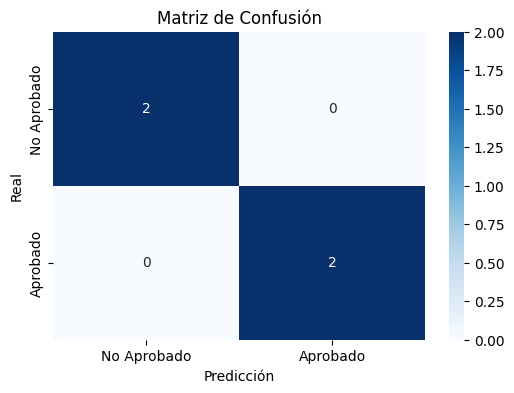

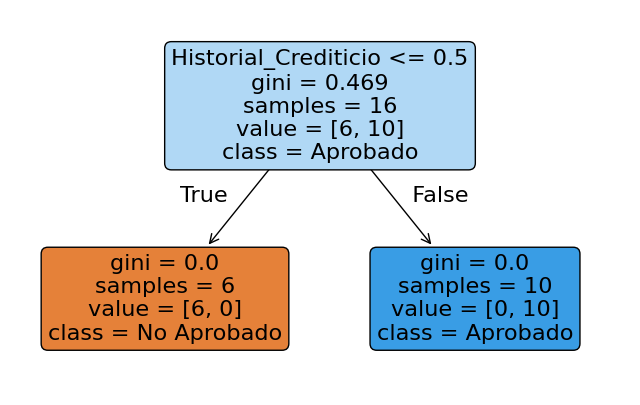

In [2]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Crear el conjunto de datos ficticio
data = {
    "Edad": [25, 45, 33, 52, 23, 36, 29, 41, 30, 50,
             22, 37, 40, 27, 48, 35, 31, 55, 26, 46],
    "Ingresos": [35, 60, 25, 80, 15, 55, 40, 75, 20, 90,
                 10, 50, 70, 30, 85, 60, 22, 95, 28, 77],
    "Historial_Crediticio": [1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                             0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
    "Nivel_Deuda": [0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
                    1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    "Aprobado": [1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# 3. Visualizar los datos
sns.pairplot(df, hue="Aprobado", diag_kind="kde")
plt.show()

# 4. Separar variables independientes y dependientes
X = df.drop(columns=["Aprobado"])
y = df["Aprobado"]

# 5. Dividir en datos de entrenamiento y prueba (80%-20%) con stratify para balancear clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 7. Realizar predicciones
y_pred = model.predict(X_test)

# 8. Evaluar el modelo con zero_division=0 para evitar warnings
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, zero_division=0))

# 9. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# 10. Visualizar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Aprobado", "Aprobado"], yticklabels=["No Aprobado", "Aprobado"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 11. Graficar el Árbol de Decisión con figura más pequeña para mejor visibilidad
plt.figure(figsize=(8,5))
plot_tree(model, feature_names=X.columns, class_names=["No Aprobado", "Aprobado"], filled=True, rounded=True)
plt.show()